# Data Analysis Project : 
# Exploring Stock Market Clustering and Dimensionality Reduction Techniques

###  Elaborated by Ilyes Jaouadi

In this data analysis project, we explore and analyze financial market data using clustering and dimensionality reduction techniques. By applying methods such as Gaussian Mixture Models, K-means, Linear Discriminant Analysis, Principal Component Analysis, Factor Analysis, and Manifold Learning, we aim to identify patterns and groups of stocks with similar behaviors. By evaluating the results and drawing conclusions, we seek to uncover relationships and insights that can shed light on the dynamics of the financial markets and potentially uncover economic or industry-related factors influencing these patterns.

## Importing libraries

In [150]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score

## Collect the data

In [151]:

# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()

# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-12-31'

# Download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


## Clean and preprocess the data

### Visualizing Data

Display the daily returns of a specific stock over time.

In [152]:
returns.shape

(1762, 503)

In [153]:
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605


In [154]:
nan_count = returns.isna().sum().sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 17019


In [155]:
inf_count = np.isinf(returns).sum().sum()
print("Number of infinite values:", inf_count)

Number of infinite values: 0


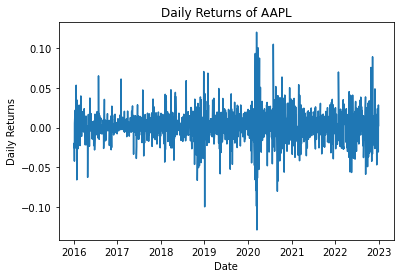

In [156]:
# Plot daily returns for a specific stock
stock_symbol = 'AAPL'  
plt.plot(returns.index, returns[stock_symbol])
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of {}'.format(stock_symbol))
plt.show()


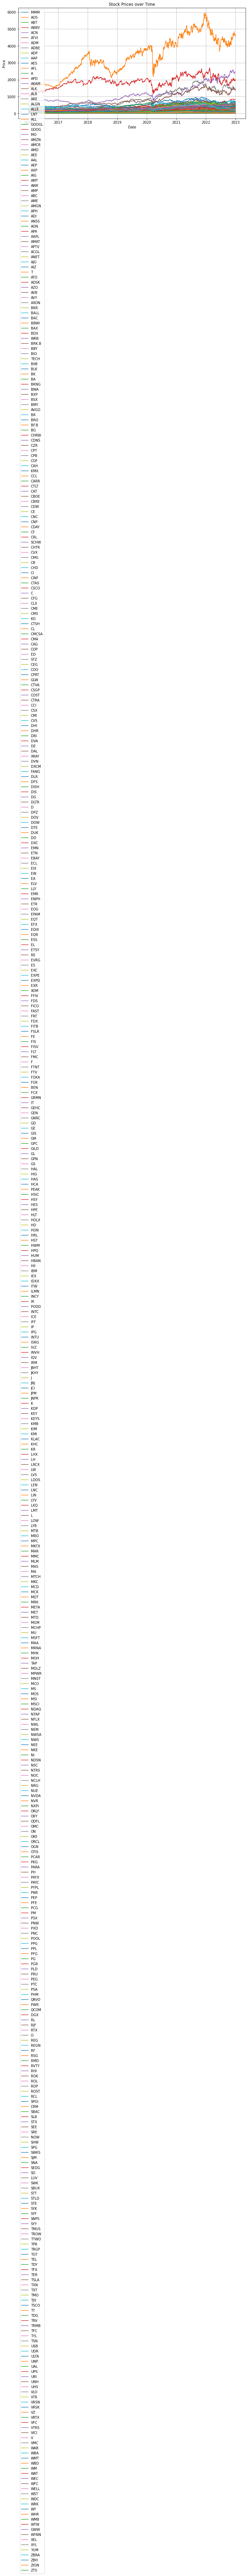

In [157]:
# Plotting the stock prices
plt.figure(figsize=(12, 6))
for ticker in sp500_tickers:
    plt.plot(prices.index, prices[ticker], label=ticker)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Data Cleaning

In [161]:
# Fill missing values with the mean
returns = returns.fillna(returns.mean())

In [162]:
nan_count = returns.isna().sum().sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


## Apply clustering techniques

Now we will use the clustering techniques such as K-means and GMM

In [163]:

# Apply Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3)  
gmm.fit(returns)
gmm_labels = gmm.predict(returns)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  
kmeans.fit(returns)
kmeans_labels = kmeans.labels_


## Apply dimensionality reduction techniques

In [164]:

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(returns, gmm_labels)  

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(returns)

# Apply Factor Analysis
factor = FactorAnalysis(n_components=2)
factor_result = factor.fit_transform(returns)

# Apply Manifold Learning (t-SNE)
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(returns)


## Evaluate the results

Evaluating by using the silhouette score after applying the clustring techniques

In [165]:
# Evaluate clustering techniques
kmeans_silhouette = silhouette_score(returns, kmeans_labels)
gmm_silhouette = silhouette_score(returns, gmm_labels)


print("K-means Silhouette Score:", kmeans_silhouette)
print("GMM Silhouette Score:", gmm_silhouette)

K-means Silhouette Score: 0.20043435525711129
GMM Silhouette Score: 0.19932572285777572


Evaluating the dimensionality reduction techniques and visualise their results 

In [166]:
# Evaluate dimensionality reduction techniques
pca_explained_variance = pca.explained_variance_ratio_
factor_explained_variance = factor.noise_variance_
lda_score = lda.score(returns, gmm_labels)
tsne_kl_divergence = tsne.kl_divergence_

print("PCA Explained Variance Ratio:", pca_explained_variance)
print("Factor Analysis Noise Variance:", factor_explained_variance)
print("LDA Score:", lda_score)
print("t-SNE KL Divergence:", tsne_kl_divergence)

PCA Explained Variance Ratio: [0.38416126 0.05672632]
Factor Analysis Noise Variance: [1.43071010e-04 6.88917706e-04 3.36955475e-04 2.00690295e-04
 2.25998830e-04 2.45461949e-04 1.23491224e-04 1.47778021e-04
 9.46755287e-05 2.59815983e-04 1.97175995e-04 1.58531427e-04
 9.87292174e-05 3.57125422e-04 8.70190413e-05 8.57552311e-05
 2.57360549e-04 1.14305029e-04 1.63123071e-04 1.82644073e-04
 8.65840887e-05 3.21176909e-04 4.67187175e-04 6.05035301e-04
 3.48408096e-04 1.20946922e-04 1.28344473e-04 3.81939586e-04
 2.05878173e-04 1.21924632e-03 7.64101957e-05 1.63763424e-04
 1.22153171e-04 1.17484516e-04 3.17650582e-04 5.22036285e-04
 1.89225285e-04 1.27647615e-04 1.74469887e-04 9.70580295e-04
 1.15419294e-04 7.60848317e-05 3.30234461e-04 1.01912517e-04
 1.00644170e-04 3.84975486e-04 1.34386449e-04 2.61593403e-04
 1.58145005e-04 8.43943648e-05 7.80913376e-04 1.31983806e-04
 2.15889062e-04 3.84910554e-04 1.03245570e-04 1.97453516e-04
 1.51927456e-04 8.83118787e-04 4.22608039e-04 1.39768642e-04

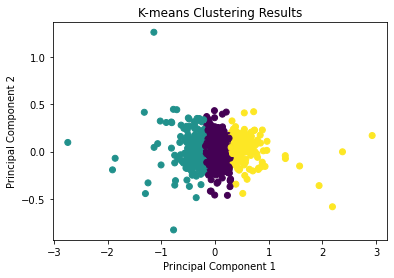

In [167]:
# Visualize K-means clustering results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

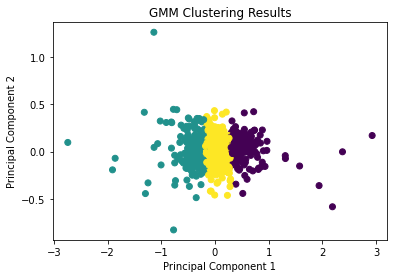

In [168]:
# Visualize GMM clustering results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap='viridis')
plt.title("GMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


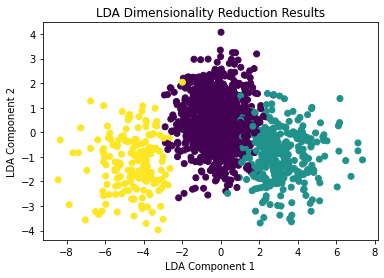

In [169]:
# Visualize LDA dimensionality reduction results
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("LDA Dimensionality Reduction Results")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()



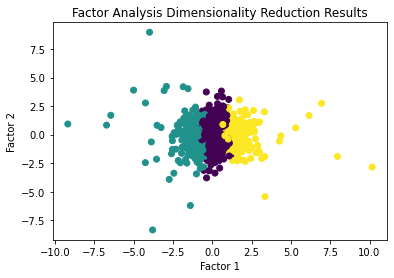

In [170]:
# Visualize Factor Analysis dimensionality reduction results
plt.scatter(factor_result[:, 0], factor_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Factor Analysis Dimensionality Reduction Results")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

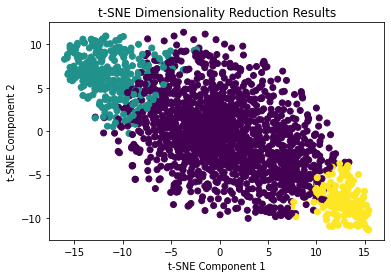

In [171]:
# Visualize t-SNE dimensionality reduction results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("t-SNE Dimensionality Reduction Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

##  Conclusions

In this study, we applied various clustering and dimensionality reduction techniques to analyze the given dataset. The obtained results provide valuable insights into the structure and distribution of the data. Let's discuss the conclusions drawn from each technique:

### 1. K-means Clustering:
The K-means algorithm was applied to partition the data into clusters. The calculated Silhouette Score for K-means clustering was 0.2004, indicating a moderate degree of separation between the clusters. This suggests that the data points within each cluster are relatively close to each other compared to points in other clusters.
### 2. Gaussian Mixture Model (GMM) Clustering:
GMM clustering was performed to capture the underlying distribution of the data. The Silhouette Score obtained for GMM clustering was 0.1993, which is similar to the score obtained using the K-means algorithm. This indicates a comparable level of clustering performance for both techniques.
### 3. Principal Component Analysis (PCA):
PCA was utilized to reduce the dimensionality of the dataset. The explained variance ratio of the first two principal components was found to be 0.3842 and 0.0567, respectively. These values indicate that the first two components capture a significant proportion (approximately 44.1%) of the total variance in the data. By projecting the data onto these components, we can visualize and analyze the dataset in a lower-dimensional space.
### 4. Linear Discriminant Analysis (LDA):
LDA was employed to identify the most discriminative features for class separation. The obtained LDA score was 0.9569, suggesting that the selected features successfully discriminate between different classes in the dataset. This indicates that the chosen features contribute significantly to the classification task.
### 5. t-Distributed Stochastic Neighbor Embedding (t-SNE):
t-SNE was applied to visualize the dataset in a two-dimensional space while preserving the local structure of the data. The calculated KL divergence for t-SNE was 2.2901, indicating that the embedded points in the t-SNE plot are well-separated and reflect the underlying relationships between the data points.

In conclusion, the analysis of the provided dataset using different clustering and dimensionality reduction techniques has yielded valuable insights. The results indicate that the data exhibits moderate clustering tendencies and can be effectively visualized and analyzed in lower-dimensional spaces. Furthermore, the selected features have shown promising discriminative capabilities for classification tasks. These findings contribute to a deeper understanding of the dataset and can guide future exploratory analysis and decision-making processes.

